<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202501/blob/main/Modulo01/CuadernoModulo01_Coef_Computation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Computing the OLS Coefficients

- Using matrix algebra, the loss function:

$$
\tilde \epsilon' \tilde \epsilon  = (y-X \tilde \beta)'(y-X \tilde \beta)
$$

  - $SSR(\tilde \beta)$ is the aggregation of squared errors if we choose $\tilde \beta$ as an estimator.

- The **least squares estimator $\hat \beta$** will be:

$$
\hat \beta = \underset{\tilde \beta}{\text{argmin}}\, SSR(\tilde \beta)
$$

## Traditional Computation using Normal Equations


### First-Order Conditions (FOC)

- The FOC are:

$$
\frac{\partial \tilde{e}' \tilde{e}}{\partial \tilde{\beta}} = 0
$$

$$
-2X'y + 2X'X \tilde{\beta} = 0
$$

- Second-Order Conditions (SOC) (**Homework**)

- Let $\hat{\beta}$ be the solution. Then $\hat{\beta}$ satisfies the following normal equation:

$$
X'X\hat{\beta} = X'y
$$

- If the inverse of $X'X$ exists, then:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

### Pros:
- Closed solution (a bonus!!)

### Cons:
- Involves inverting a $K \times K$ matrix $X'X$.
- Requires allocating $O(nk + k^2)$ memory.

Let's illustrate this in R

In [1]:
# install.packages("pacman") #Correr esta linea en Google Colab

In [2]:
# Cargamos los paquetes

require("pacman")

p_load("tidyverse","stargazer")


Loading required package: pacman



Creamos unos datos de juguete para ilustrar:

In [3]:
dta<-tibble(lnwage=c(5,10,12.50),educ=c(8,12,16))
dta

lnwage educ
1  5.0    8  
2 10.0   12  
3 12.5   16

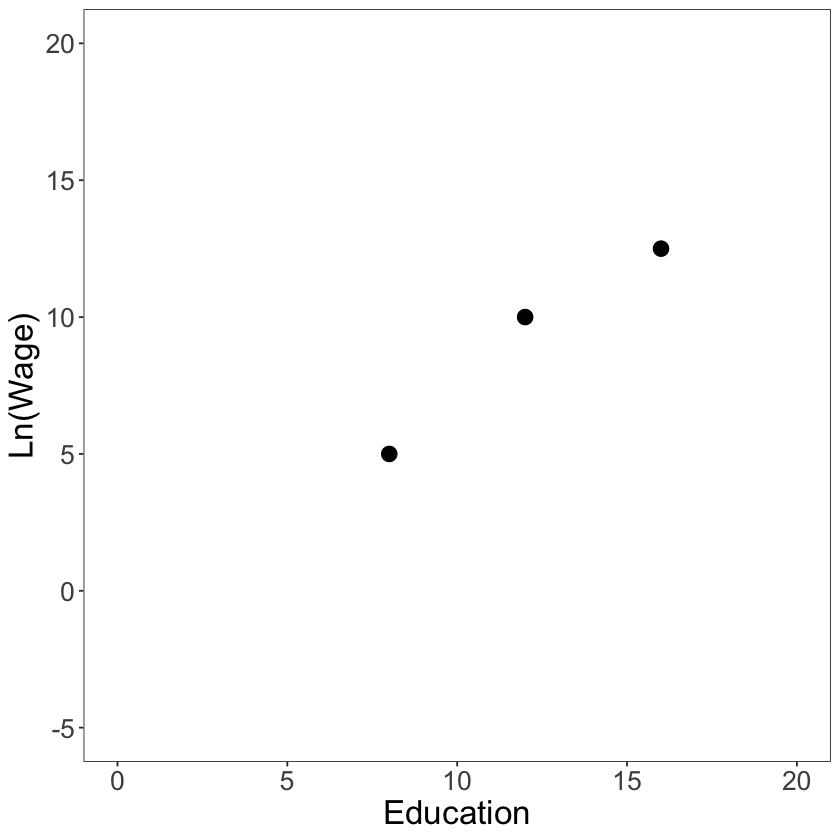

In [4]:
ggplot(dta,aes(x=educ,y=lnwage)) +
  geom_point(alpha=1,size=4) +
  theme_bw()  +
  xlab("Education") +
  ylab("Ln(Wage)") +
  xlim(0,20) +
  ylim(-5,20) +
  theme(legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=20)
  )


In [5]:
# dependant variable as a one-column matrix, i.e., a vector
y<-matrix(dta$lnwage,ncol=1)

# the design matrix
X<-model.matrix(~educ,data=dta)

X

(Intercept) educ
1 1            8  
2 1           12  
3 1           16

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

In [6]:
beta_coef<-solve(t(X)%*%X)%*%t(X)%*%y

beta_coef

[,1]     
(Intercept) -2.083333
educ         0.937500

In [7]:
reg_with_lm<- lm(lnwage~educ,data=dta)

In [8]:
reg_with_lm


Call:
lm(formula = lnwage ~ educ, data = dta)

Coefficients:
(Intercept)         educ  
    -2.0833       0.9375  


In [9]:
str(reg_with_lm)

List of 12
 $ coefficients : Named num [1:2] -2.083 0.937
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "educ"
 $ residuals    : Named num [1:3] -0.417 0.833 -0.417
  ..- attr(*, "names")= chr [1:3] "1" "2" "3"
 $ effects      : Named num [1:3] -15.88 -5.3 -1.02
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "educ" ""
 $ rank         : int 2
 $ fitted.values: Named num [1:3] 5.42 9.17 12.92
  ..- attr(*, "names")= chr [1:3] "1" "2" "3"
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:3, 1:2] -1.732 0.577 0.577 -20.785 -5.657 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:3] "1" "2" "3"
  .. .. ..$ : chr [1:2] "(Intercept)" "educ"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.58 1.26
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 1
 $ xlevels      : Named list()
 $ call         : language lm(formula = lnwage ~ educ, data = dta)
 $ terms     

## Traditional Computation using QR Decomposition

- To avoid inverting $X'X$, we can use matrix decomposition: **QR decomposition**.
- Most software uses this technique.


In [10]:
lm.fit(X,y)$coefficients

(Intercept)        educ 
  -2.083333    0.937500

In [11]:
#?lm.fit

**Theorem:**
If $A \in \mathbb{R}^{n \times k}$, there exists an orthogonal $Q \in \mathbb{R}^{n \times k}$ and an upper triangular $R \in \mathbb{R}^{k \times k}$ such that $A = QR$.

#### Properties:
- Orthogonal Matrices:
  - Definition: $Q'Q = QQ' = I$ and $Q' = Q^{-1}$
  - Property: The product of orthogonal matrices is orthogonal. For example, if $A'A = I$ and $B'B = I$, then $(AB)'(AB) = B'(A'A)B = B'B = I$.
- **Thin QR:** If $A \in \mathbb{R}^{n \times k}$ has full column rank, then $A = Q_1R_1$, where $Q_1 \in \mathbb{R}^{n \times k}$, and $R$ is upper triangular with positive diagonal entries.





How it works to get $\hat \beta$?


\begin{align}
  (X'X) \hat \beta &=  X'y  \\
  (R'Q'QR) \hat \beta &=  R'Q'y  \\
  (R'R) \hat \beta &=  R'Q'y  \\
  R \hat \beta &=  Q'y  
\end{align}

- Solve by back substitution

1. QR factorization: $X'X = QR$

In [12]:
XtX<-t(X)%*%X

In [13]:
QR<-qr(X)

In [14]:
R<- qr.R(QR)
R

(Intercept) educ      
1 -1.732051   -20.784610
2  0.000000    -5.656854

In [15]:
Q<- qr.Q(QR)
Q

[,1]       [,2]         
[1,] -0.5773503  7.071068e-01
[2,] -0.5773503  1.110223e-16
[3,] -0.5773503 -7.071068e-01

2. Calculate $Q'y$.

In [16]:
t(Q)%*%y

[,1]      
[1,] -15.877132
[2,]  -5.303301




3. Solve:

$$
\begin{bmatrix}
-1.73 & -20.78 \\
0 & -5.65
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
=
\begin{bmatrix}
-15.87 \\
-5.30
\end{bmatrix}
$$

Solution: $(\beta_1, \beta_2) = (3.5, -0.5)$.




In [17]:
beta1<-  -5.303301/-5.656854
beta1

[1] 0.9375001

In [18]:
beta0<- (-15.877132 -  (-20.784610*beta1)) /-1.732051
beta0

[1] -2.083334

In [19]:
lm.fit(X,y)$coefficients

(Intercept)        educ 
  -2.083333    0.937500

### Householder transformation (Extra)


There are many ways to implement the QR decomposition, like the Gram-Schmidt process and the Household transformation. 
In R, the QR decomposition used in functions like `lm()` is implemented via Householder reflections, a standard and numerically stable algorithm for computing the QR decomposition implemented using the [LAPACK library](https://www.netlib.org/lapack/).

Householder reflections are much more stable than the Gram-Schmidt process, which can accumulate rounding errors, and the algorithms are quite efficient for moderate data sets.

To illustrate the **Householder transformation** for the QR decomposition in your linear regression example, we can explicitly perform the steps of the algorithm. The goal is to decompose $ \mathbf{X} $ into $ \mathbf{Q} $ and $ \mathbf{R} $, where $ \mathbf{Q} $ is orthogonal and $ \mathbf{R} $ is upper triangular. The algorithm for the QR decomposition can be summarized as:

**Input**: Matrix $ \mathbf{X} $ of size $ n \times k $.  
**Output**: Matrices $ \mathbf{Q} $ (orthogonal) and $ \mathbf{R} $ (upper triangular).


##### **Steps**
1. **Initialize**:
   - Let $ \mathbf{Q} = \mathbf{I}_n $ (identity matrix of size $ n \times n $).
   - Let $ \mathbf{R} = \mathbf{X} $.

2. **Iterate over each column of $ \mathbf{X} $**:
   - For $ j = 1, 2, \dots, k $:
     1. Extract the column $ \mathbf{r}_j = \mathbf{R}[j:n, j] $ (the portion below and including the diagonal).
     2. Compute the **norm** of $ \mathbf{r}_j $:  
        $ \text{norm} = \|\mathbf{r}_j\|_2 = \sqrt{\sum (\mathbf{r}_j^2)} $.
     3. Construct the **reflection vector** $ \mathbf{v} $:
        - $ \mathbf{v} = \mathbf{r}_j $
        - Modify the first element of $ \mathbf{v} $:  
          $ \mathbf{v}[1] = \mathbf{r}_j[1] + \text{sign}(\mathbf{r}_j[1]) \cdot \text{norm} $.
        - Normalize $ \mathbf{v} $:  
          $ \mathbf{v} = \mathbf{v} / \|\mathbf{v}\|_2 $.
     4. Form the **Householder matrix** $ \mathbf{H}_j $:
        - $ \mathbf{H}_j = \mathbf{I} - 2 \mathbf{v} \mathbf{v}^\top $.
        - Expand $ \mathbf{H}_j $ to size $ n \times n $ by applying it to rows $ j $ to $ n $ only.
     5. Apply $ \mathbf{H}_j $ to $ \mathbf{R} $:
        - $ \mathbf{R} = \mathbf{H}_j \mathbf{R} $.
     6. Accumulate $ \mathbf{Q} $:
        - $ \mathbf{Q} = \mathbf{Q} \cdot \mathbf{H}_j^\top $.

3. **Finalize**:
   - The resulting $ \mathbf{Q} $ is orthogonal, and $ \mathbf{R} $ is upper triangular.

Here's how we can approach this in R, step by step:

##### Step 1: Define the Design Matrix

We take our design matrix $\mathbf{X}$ 


In [20]:
X

(Intercept) educ
1 1            8  
2 1           12  
3 1           16

##### Step 2: Apply the Householder Transformation
The Householder transformation is applied to zero out the sub-diagonal entries of the first column of $ \mathbf{X}$ , then the second column, and so on.



###### First Reflection
1. Define the first column $ \mathbf{x}_1 $ of $ \mathbf{X}$.
2. Compute the reflection vector $ \mathbf{v} $ and construct the Householder matrix $ \mathbf{H}_1 $.


In [21]:
householder <- function(x) {
  # Compute the norm of x
  norm_x <- sqrt(sum(x^2))
  
  # Define the reflection vector v
  v <- x
  v[1] <- x[1] + sign(x[1]) * norm_x
  
  # Normalize v
  v <- v / sqrt(sum(v^2))
  
  # Construct the Householder matrix
  H <- diag(length(x)) - 2 * v %*% t(v)
  
  return(H)
}


In [22]:
# First column of X
x1 <- X[, 1]

# Apply Householder transformation for the first column
H1 <- householder(x1)

H1

1          2          3         
[1,] -0.5773503 -0.5773503 -0.5773503
[2,] -0.5773503  0.7886751 -0.2113249
[3,] -0.5773503 -0.2113249  0.7886751

In [23]:
# Transform X
X1 <- H1 %*% X
X1

(Intercept) educ      
[1,] -1.732051   -20.784610
[2,]  0.000000     1.464102
[3,]  0.000000     5.464102

#####  Second Reflection
We now apply a second Householder transformation to the second column of $ \mathbf{X}_1$, ignoring the first row (already triangular).


In [24]:
# Extract the second column below the diagonal
x2 <- X1[2:3, 2]

# Apply Householder transformation
H2_partial <- householder(x2)

# Expand H2 to be a full matrix
H2 <- diag(3)
H2[2:3, 2:3] <- H2_partial

H2

[,1] [,2]       [,3]      
[1,] 1     0.0000000  0.0000000
[2,] 0    -0.2588190 -0.9659258
[3,] 0    -0.9659258  0.2588190

In [25]:
# Transform X1
X2 <- H2 %*% X1
X2

(Intercept) educ         
[1,] -1.732051   -2.078461e+01
[2,]  0.000000   -5.656854e+00
[3,]  0.000000    1.110223e-15

At this stage, $\mathbf{X}_2$ is fully upper triangular.

##### Step 3: Combine Householder Matrices
The overall $ \mathbf{Q} $ matrix is the product of the Householder matrices:
$$
\mathbf{Q} = H_1^\top H_2^\top
$$

In [26]:
Qhoush <- t(H2) %*% t(H1)
Qhoush

[,1]       [,2]          [,3]      
[1,] -0.5773503 -5.773503e-01 -0.5773503
[2,]  0.7071068  1.942890e-16 -0.7071068
[3,]  0.4082483 -8.164966e-01  0.4082483

In [27]:
Rhouse<-X2


In [28]:
round(Rhouse,2)

(Intercept) educ  
[1,] -1.73       -20.78
[2,]  0.00        -5.66
[3,]  0.00         0.00

In [29]:
round(R,2)

(Intercept) educ  
1 -1.73       -20.78
2  0.00        -5.66

**Why the Last Row of $ \mathbf{R} $ in the Householder transformation is Zero?**

The matrix $ \mathbf{R} $ is the result of applying the Householder transformations to $ \mathbf{X} $. If $ \mathbf{X} $ has more rows ($ n $) than columns ($ k $), the matrix $ \mathbf{R} $ will have a size $ n \times k $, but:

1. **Triangular Shape**: $ \mathbf{R} $ is upper triangular by definition.
   - The first $ k $ rows of $ \mathbf{R} $ contain meaningful values.
   - The remaining $ n - k $ rows (if $ n > k $) are all zeros because the decomposition process eliminates entries below the main diagonal for each column of $ \mathbf{X} $.

2. **Overdetermined Systems**: In regression, $ n > k $ is common because there are more observations than predictors.
   - After applying the Householder reflections, the additional rows beyond the $ k $-th row become zeros due to the nature of the decomposition.


**What R's `qr()` Function Does**
In R, the `qr()` function is designed to return a compact representation of $ \mathbf{R} $:
- **Truncated $ \mathbf{R} $**: The function returns only the first $ k $ rows of $ \mathbf{R} $, as the remaining $ n - k $ rows are guaranteed to be zeros and contain no additional information.
- This behavior intentionally saves memory and focuses on the part of $ \mathbf{R} $ that is meaningful for solving the regression problem.


## Traditional Computation using SVD Decomposition

The **Singular Value Decomposition (SVD)** provides a robust method for solving linear regression problems, particularly when the design 
matrix $ \mathbf{X} $ is ill-conditioned or rank-deficient. For a matrix $ \mathbf{X} $ of size $ n \times k $, the SVD is:

$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top,
$$

where $ \mathbf{U} $ ($ n \times n $) and $ \mathbf{V} $ ($ k \times k $) are orthogonal matrices, and $ \mathbf{\Sigma} $ ($ n \times k $) is a diagonal matrix containing the singular values of $ \mathbf{X} $, denoted as $ \sigma_1, \sigma_2, \ldots, \sigma_r $ ($ r $ is the rank of $ \mathbf{X} $).

To solve the regression $ \mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon} $, the coefficients $ \mathbf{\beta} $ are estimated using the pseudoinverse of $ \mathbf{X} $:

$$
\mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} = \mathbf{V} \mathbf{\Sigma}^+ \mathbf{U}^\top \mathbf{y},
$$

where $ \mathbf{\Sigma}^+ $ is the pseudoinverse of $ \mathbf{\Sigma} $, obtained by inverting the nonzero singular values and transposing the matrix. This method is numerically stable and handles cases where $ \mathbf{X} $ is not full rank.

This is the way that is solved in `Python` by [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) that [LAPACK](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

## Big Data and Machine Learning Way: Gradient Descent

<div>
    <img src="figs/meme_gradient_descent.png"  style="width: 300px;" />
</div>

- Gradient Descent is a generic optimization algorithm that finds optimal solutions to various problems.
- The general idea is to tweak parameters iteratively to minimize a loss function:

$$
\text{min}_f E[L(y_i, f(\boldsymbol{X_i}))]
$$

### Computing OLS Coefficients

The problem is to estimate the coefficients of vector $\beta$ that minimize the objective function:

$$
\text{argmin}_\beta \sum_{i=1}^{n} \frac{1}{n} \left(y_i - \beta_0 + \sum_{k=1}^K X_k \beta_k\right)^2
$$



#### Intuition: Loss Function (1D and 2D)

##### **1D Loss Function:**

<div >
<img src = "figs/reg0.png"   style="width: 800px;"  />
</div>

#####  **2D Loss Function:**


<div >
<img src = "figs/ols1.png"  style="width: 800px;" />
</div>



#### The algorithm

<div >
<img src = "figs/step_size1.png"  style="width: 800px;" />
</div>





1. Randomly pick starting values for the parameters.
2. Compute the gradient of the objective function at the current parameter values using all observations from the sample.
3. Update the parameters.
4. Repeat from step 2 until a fixed number of iterations or convergence.

More formally,

- At a point $\beta \in \mathbb{R}^k$, at step $j$, Gradient Descent moves in a direction $\delta \beta$ such that:

$$
L(\beta^{(j)} + \delta \beta) < L(\beta^{(j)})
$$

- Choice of $\delta \beta$:

$$\delta \beta = -\epsilon \nabla_\beta L(\beta^{(j)})$$

-   replacing

$$
\beta^{(j+1)} = \beta^{(j)} - \epsilon \nabla_\beta L(\beta^{(j)})
$$

- Define the learning step $\epsilon$ (*more on this below*).


In our example, OLS example


$$
L(\alpha,\beta)=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-(\alpha+\beta x_{i}))^{2} \nonumber
$$

The Gradient

\begin{align}
\nabla L(\alpha,\beta)=\left(\begin{array}{c}
\frac{\partial L}{\partial\alpha}\\
\frac{\partial L}{\partial\beta}
\end{array}\right)=\left(\begin{array}{c}
-\frac{2}{n}\sum_{i=1}^{n}(y_{i}-\alpha-\beta x_{i})\\
-\frac{2}{n}\sum_{i=1}^{n}x_{i}(y_{i}-\alpha-\beta x_{i})
\end{array}\right)  \nonumber
\end{align}

Updating
\begin{align}
\alpha^{(j+1)} &=\alpha^{(j)}-\epsilon\frac{\partial L}{\partial\alpha} \nonumber \\
\beta^{(j+1)} &= \beta^{(j)}-\epsilon\frac{\partial L}{\partial\beta} \nonumber
\end{align}



Start with an initial guess: $\alpha=-1;\beta=2$ , and a learning rate ($\epsilon=0.005$). Then we have

\begin{align}
\alpha^{j=2} &=(-1)-0.005\left(-2/3\times\left((5-(-1)-2\times8)+(10-(-1)-2\times12\right)+(12.5-(-1)-2\times16)\right) \nonumber \\
\beta^{j=2} &=2+0.005\left(-2/3\times\left(8(5-(-1)-2\times8)+12(10-(-1)-2\times12\right)+16(12.5-(-1)-2\times16)\right) \nonumber \\
\alpha^{j=2}&=-1.1384 \nonumber \\
\beta^{j=2} &=0.2266 \nonumber
\end{align}

In [30]:
gradiente_alpha<-function(alpha,beta){ -(2/3)*((5-alpha-beta*8)+(10-alpha-beta*12)+(12.5-alpha-beta*16))}
gradiente_beta<-function(alpha,beta){ -(2/3)*(8*(5-alpha-beta*8)+12*(10-alpha-beta*12)+16*(12.5-alpha-beta*16))}


# Empty vector
alpha<-list()
beta<-list()

# First Values
alpha[[1]]<- -1
beta[[1]]<- 2

# Learning Rate
epsilon<-0.005

# Second iteration
j<-2

alpha[[j]]<-alpha[[j-1]]-epsilon*gradiente_alpha(alpha[[j-1]],beta[[j-1]])
beta[[j]]<- beta[[j-1]]-epsilon*gradiente_beta(alpha[[j-1]],beta[[j-1]])



In [31]:
alpha[[j]]

[1] -1.138333

In [32]:
beta[[j]]

[1] 0.2266667

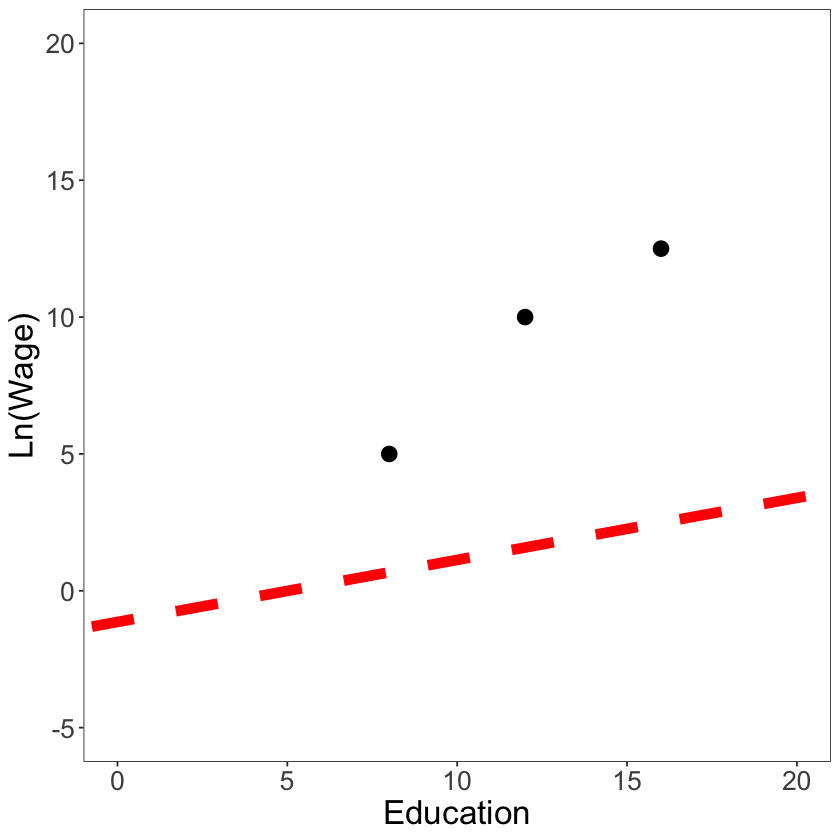

In [33]:
ggplot(dta,aes(x=educ,y=lnwage)) +
  geom_point(alpha=1,size=4) +
  theme_bw()  +
  xlab("Education") +
  ylab("Ln(Wage)") +
  xlim(0,20) +
  ylim(-5,20) +
  geom_abline(intercept = alpha[[j]], slope = beta[[j]],linewidth=3, col="red",lty="dashed") +
  theme(legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=20)
  ) 



In [34]:
j<-3

alpha[[j]]<-alpha[[j-1]]-epsilon*gradiente_alpha(alpha[[j-1]],beta[[j-1]])
beta[[j]]<- beta[[j-1]]-epsilon*gradiente_beta(alpha[[j-1]],beta[[j-1]])


In [35]:
alpha

[[1]]
[1] -1

[[2]]
[1] -1.138333

[[3]]
[1] -1.062483

In [36]:
beta

[[1]]
[1] 2

[[2]]
[1] 0.2266667

[[3]]
[1] 1.212689

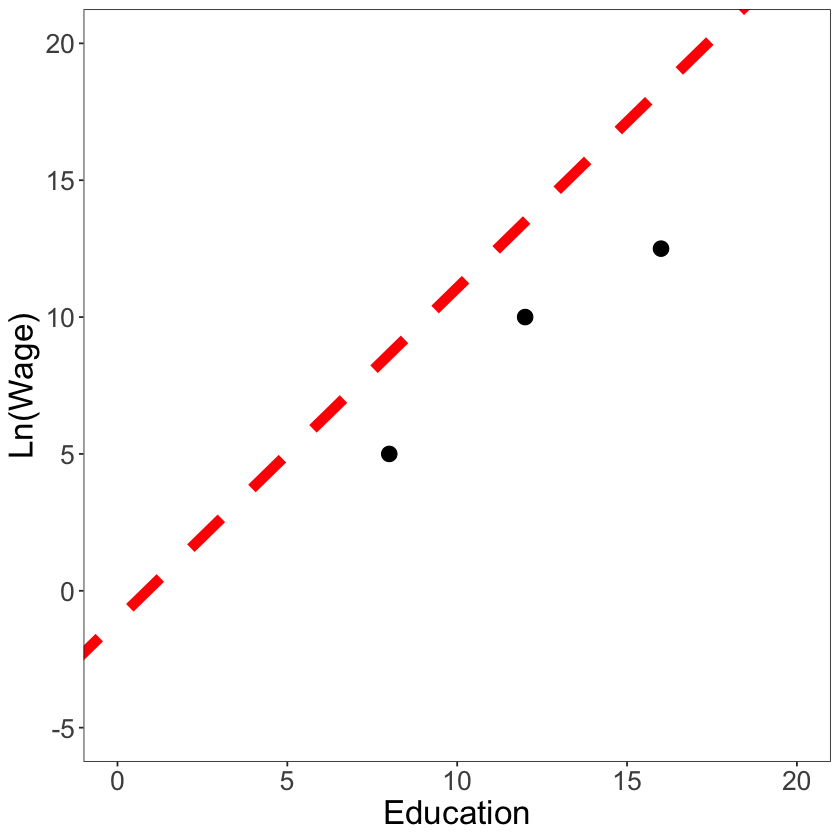

In [37]:
ggplot(dta,aes(x=educ,y=lnwage)) +
  geom_point(alpha=1,size=4) +
  theme_bw()  +
  xlab("Education") +
  ylab("Ln(Wage)") +
  xlim(0,20) +
  ylim(-5,20) +
  geom_abline(intercept = alpha[[j]], slope = beta[[j]],linewidth=3, col="red",lty="dashed") +
  theme(legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=20)
  ) 


In [38]:
i<-2
tol<-0.000001

difff<-2

Loss<-function(alpha,beta){ 1/3*((5-alpha-beta*8)+(10-alpha-beta*12)+(12.5-alpha-beta*16))}

while( (difff>tol)==TRUE ){
  
  alpha[[i+1]]<- alpha[[i]]- epsilon*gradiente_alpha(alpha[[i]],beta[[i]])
  beta[[i+1]] <- beta[[i]] - epsilon*gradiente_beta(alpha[[i]],beta[[i]])
  
  difff<-abs(Loss(alpha[[i]],beta[[i]])-Loss(alpha[[i-1]],beta[[i-1]]))
  
  i<-i+1
  print(i)
}






[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1] 140


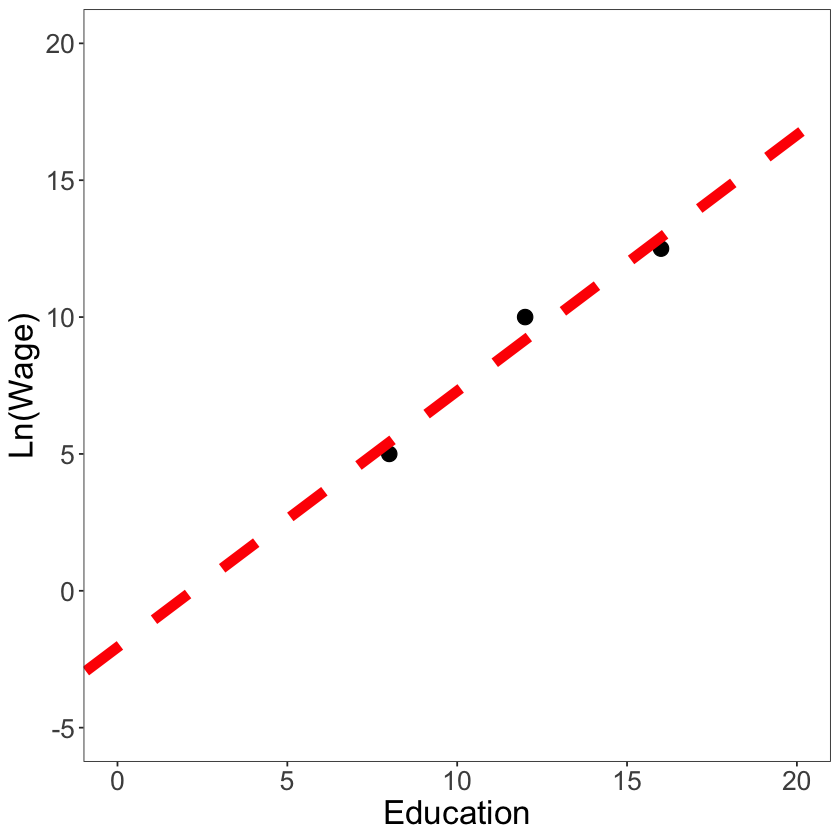

In [39]:
ggplot(dta,aes(x=educ,y=lnwage)) +
  geom_point(alpha=1,size=4) +
  theme_bw()  +
  xlab("Education") +
  ylab("Ln(Wage)") +
  xlim(0,20) +
  ylim(-5,20) +
  geom_abline(intercept = alpha[[i]], slope = beta[[i]],linewidth=3, col="red",lty="dashed") +
  #geom_abline(intercept = lm.fit(X,y)$coefficients[1], slope = lm.fit(X,y)$coefficients[2],linewidth=3, col="blue",lty="dashed") +
  theme(legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=20)
  ) 


### The learning rate

We can choose $\epsilon$ in several different ways:

 - Set $\epsilon$ to a small constant. (like before)
 


<div >
<img src = "figs/step_size2.png"  style="width: 800px;"/>
</div>

- Use varying learning rates (*more on this later*)

## Computational Complexity

| **Method**             | **Computational Complexity**                     | **Description**                                                                                     | **Large $k$** | **Large $n$** | **Hyperparameters** |
|-------------------------|--------------------------------------------------|-----------------------------------------------------------------------------------------------------|----------------|----------------|----------------------|
| **Inverting $ \mathbf{X}'\mathbf{X} $** | $ \mathcal{O}(nk^2 + k^3) $                    | Direct computation using $ \mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} $. Requires inversion of $ \mathbf{X}^\top \mathbf{X} $, which is costly for large $k$. | Slow               | Slow               | 0                    |
| **QR Decomposition**   | $ \mathcal{O}(nk^2) $                          | Used in R's `lm()`. Solves $ \mathbf{X}^\top \mathbf{X} \mathbf{\beta} = \mathbf{X}^\top \mathbf{y} $ via QR decomposition. Efficient for moderate $k$. | Fast               | Slow               | 0                    |
| **SVD**                | $ \mathcal{O}(nk^2 + k^3) $                    | Used in Python's `scikit-learn`. Computes $ \mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top $. Provides numerical stability. Suitable for ill-conditioned matrices. | Fast               | Slow               | 0                    |
| **Gradient Descent**   | $ \mathcal{O}(n k \cdot \text{iter}) $          | Iterative method. $ \text{iter} $ is the number of iterations required for convergence. Efficient for very large $n$, $k$. | Slow               | Fast               | 2                    |
